In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rrebirrth_animals_with_attributes_2_path = kagglehub.dataset_download('rrebirrth/animals-with-attributes-2')

print('Data source import complete.')

100%|██████████| 13.0G/13.0G [07:27<00:00, 31.1MB/s]

Extracting files...


Data source import complete.


##ilgili hayvan klasörlerindeki ilk 650 fotoğrafı alalım

In [ ]:
import os

# Initialize the dictionary to hold paths for each animal
image_paths = {}

# Base directory for your dataset
base_path = "/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/"

# List of animals to search for
animals = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]

# Traverse the directory structure
for dirname, _, filenames in os.walk(base_path):
    for animal in animals:
        # Check if the current directory contains the animal's name
        if animal in dirname:
            # Initialize the list if the animal is encountered for the first time
            if animal not in image_paths:
                image_paths[animal] = []
            # Add all image paths for the current animal
            for filename in filenames:
                image_paths[animal].append(os.path.join(dirname, filename))

# Print the paths for verification
# Print "Print the paths for verification"
print("Print the paths for verification:")
for animal, paths in image_paths.items():
    print(f"{animal}: {len(paths)} images")

# Get first 650 images and delete others
for animal, paths in image_paths.items():
    image_paths[animal] = paths[:650]

# Print the paths for verification
print("Print the number of images in each path after deletion:")
for animal, paths in image_paths.items():
    print(f"{animal}: {len(paths)} images")

Print the paths for verification:
giant+panda: 874 images
elephant: 1038 images
polar+bear: 868 images
rabbit: 1088 images
moose: 704 images
dolphin: 946 images
squirrel: 1200 images
fox: 664 images
sheep: 1420 images
collie: 1028 images
Print the number of images in each path after deletion:
giant+panda: 650 images
elephant: 650 images
polar+bear: 650 images
rabbit: 650 images
moose: 650 images
dolphin: 650 images
squirrel: 650 images
fox: 650 images
sheep: 650 images
collie: 650 images


##Fotoğrafları aynı boyuta getirmek için öncelikle en doğru boyutu bulmaya çalışalım. Bunun için öncelikle hangi boyutlu fotoğrafların çoğunlukta olduğunu bulalım.

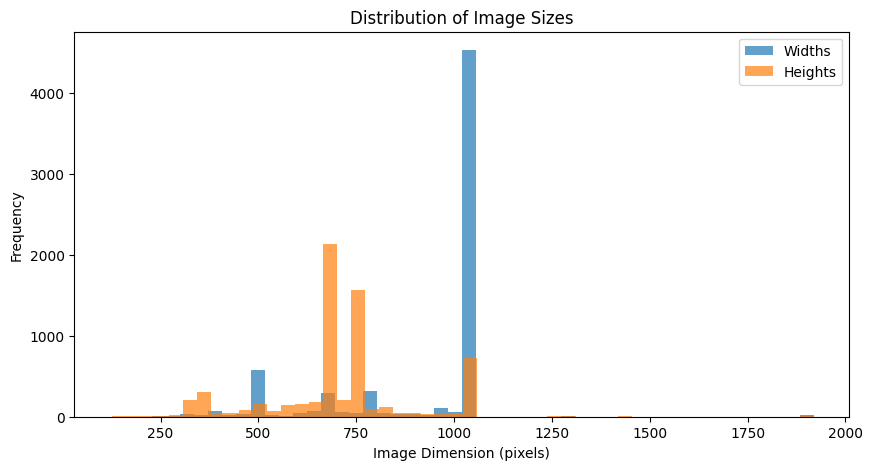

In [16]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# ... (Your existing code to populate image_paths dictionary) ...

image_sizes = {}
for animal, paths in image_paths.items():
    image_sizes[animal] = []
    for path in paths:
        try:
            img = cv2.imread(path)
            height, width, _ = img.shape  # Get height, width (ignore channels)
            image_sizes[animal].append((width, height))
        except Exception as e:
            print(f"Error reading image: {path}, Error: {e}")

all_sizes = [size for animal_sizes in image_sizes.values() for size in animal_sizes]
widths = [size[0] for size in all_sizes]
heights = [size[1] for size in all_sizes]

plt.figure(figsize=(10, 5))
plt.hist(widths, bins=50, alpha=0.7, label='Widths')
plt.hist(heights, bins=50, alpha=0.7, label='Heights')
plt.title('Distribution of Image Sizes')
plt.xlabel('Image Dimension (pixels)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

En sık görülen fotoğraf genişiliği 1024 pixel ve en sık görülen fotoğraf yüksekliği ise 680 civarında (2. sırada ise 750 var) Yükseklik için ortalama 720 pixel en sık görülen yükseklik olarak alabiliriz.
Fotoğrafları 4'te bir oranına küçültmek istersek, genişlik 256, yükseklik 178 alabiliriz

##Fotoğrafların boyutunu 128x98 olacak şekilde yeniden boyutlandıralım

In [ ]:
import cv2

def resize_images(image_paths, new_size):
    resized_image_paths = {}  # Initialize an empty dictionary to store resized images
    for animal, paths in image_paths.items():
        resized_image_paths[animal] = []  # Initialize a list for each animal
        for path in paths:
            try:
                img = cv2.imread(path)
                resized_img = cv2.resize(img, new_size)
                resized_image_paths[animal].append(resized_img)  # Append resized image to the list
            except Exception as e:
                print(f"Error reading image: {path}, Error: {e}")
    return resized_image_paths  # Return the dictionary containing resized images

new_width = 256
new_height = 178
new_var = (new_width, new_height)

resized_images = resize_images(image_paths=image_paths, new_size=new_var) # Call the function without nested parantheses


##Boyutu değiştirilen bir fotoğrafı görüntüleyelim

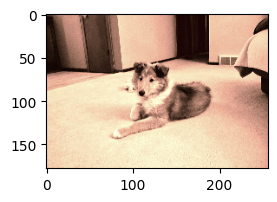

In [ ]:
#verify one of the images size
size_test = resized_images['collie'][0]
size_test.shape
#Show the resized image with correct colors in 256x178 size
plt.figure(figsize=(4, 2))
plt.imshow(cv2.cvtColor(size_test, cv2.COLOR_BGR2RGB))

##Fotoğrafları %70 eğitim, %30 test olacak şekilde ayıralım

In [ ]:
import os
from sklearn.model_selection import train_test_split

# ... (Your existing code to populate image_paths dictionary) ...

# Initialize dictionaries to store train and test paths
train_image_paths = {}
test_image_paths = {}

# Set random state for reproducibility
random_state = 42

for animal, paths in resized_images.items():
    # Split paths into train and test sets
    train_paths, test_paths = train_test_split(
        paths, test_size=0.3, random_state=random_state
    )

    # Store train and test paths in separate dictionaries
    train_image_paths[animal] = train_paths
    test_image_paths[animal] = test_paths

# Print the number of images in each set for verification
for animal, paths in train_image_paths.items():
    print(f"Train - {animal}: {len(paths)} images")

for animal, paths in test_image_paths.items():
    print(f"Test - {animal}: {len(paths)} images")


Train - giant+panda: 455 images
Train - elephant: 455 images
Train - polar+bear: 455 images
Train - rabbit: 455 images
Train - moose: 455 images
Train - dolphin: 455 images
Train - squirrel: 455 images
Train - fox: 455 images
Train - sheep: 455 images
Train - collie: 455 images
Test - giant+panda: 195 images
Test - elephant: 195 images
Test - polar+bear: 195 images
Test - rabbit: 195 images
Test - moose: 195 images
Test - dolphin: 195 images
Test - squirrel: 195 images
Test - fox: 195 images
Test - sheep: 195 images
Test - collie: 195 images


##Eğtim ve test amacıyla ayrılan fotoğraflardan birer örnek gösterelim

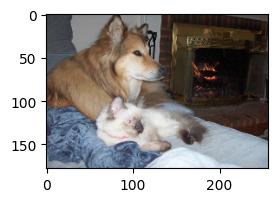

In [ ]:
#show one of the train images
plt.figure(figsize=(4, 2))
plt.imshow(cv2.cvtColor(train_image_paths['collie'][0], cv2.COLOR_BGR2RGB))

#show one of the test images
plt.figure(figsize=(4, 2))
plt.imshow(cv2.cvtColor(test_image_paths['collie'][0], cv2.COLOR_BGR2RGB))


##Eğitim setine veri arttırma uygulayalım

In [ ]:
import cv2
import numpy as np
import random

def augment_image(image):
    """Applies random augmentations to an image."""

    augmentations = [
        lambda img: blur_image(img),  # Blurring
        lambda img: flip_image(img),  # Horizontal flipping
        lambda img: detect_edges(img),  # Edge Detection (using cv2.Canny)
        lambda img: rotate_image(img, random.randint(-15, 15)),  # Random rotation
        lambda img: add_noise(img),  # Random Noise
        lambda img: random_resize_crop(img, new_width, new_height)  # Resize and Crop
    ]

# Apply 1-3 random augmentations
    num_augmentations = random.randint(1, 3)
    selected_augmentations = random.sample(augmentations, num_augmentations)

    augmented_image = image
    for augmentation in selected_augmentations:
        augmented_image = augmentation(augmented_image)
    return augmented_image

def blur_image(image, kernel_size=(5, 5)):
    """Applies Gaussian blur to an image."""
    blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
    return blurred_image

def flip_image(image, flip_code=1):
    """Flips an image horizontally (flip_code=1) or vertically (flip_code=0)."""
    flipped_image = cv2.flip(image, flip_code)
    return flipped_image

def detect_edges(image, threshold1=100, threshold2=200):
    edges = cv2.Canny(image, threshold1, threshold2)
    # Resize the edges image to match original image shape
    edges = cv2.resize(edges, (image.shape[1], image.shape[0]))  # Ensure original size
    return edges

def rotate_image(image, angle):
    """Rotates an image by a given angle."""
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

def add_noise(image):
    """Adds random noise to an image."""
    noise = np.random.randint(-20, 20, image.shape, dtype=np.int16)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

def random_resize_crop(image, new_width, new_height):
    #randomly choose a resizing scale
    scale = random.uniform(0.8, 1.2)

    #Resize the image
    resized_image = cv2.resize(image, (int(new_width * scale), int(new_height * scale)))

    #Calculate start position for cropping
    height, width = resized_image.shape[:2]
    start_row = random.randint(0, height - new_height) if height > new_height else 0
    start_col = random.randint(0, width - new_width) if width > new_width else 0

    #Crop the resized image
    cropped_image = resized_image[start_row:start_row + new_height, start_col:start_col + new_width]

    return cropped_image

# Example usage with your resized_images dictionary:
augmented_train_images = {}
for animal, images in train_image_paths.items():
    augmented_train_images[animal] = [augment_image(image) for image in images]



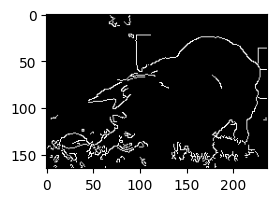

In [ ]:
plt.figure(figsize=(4, 2))
plt.imshow(cv2.cvtColor(augmented_train_images['collie'][250], cv2.COLOR_BGR2RGB))

renk sabitliği uygulayalım

In [ ]:
import cv2
import numpy as np

def apply_gray_world(image):
    """Applies Gray-World color constancy to an image."""
    # Check if the image has 3 channels (color image)
    if len(image.shape) == 3 and image.shape[2] == 3:  # Check if image has 3 channels
        image_float = image.astype(np.float32)
        avg_r = np.mean(image_float[:, :, 2])
        avg_g = np.mean(image_float[:, :, 1])
        avg_b = np.mean(image_float[:, :, 0])

        scale_r = avg_g / avg_r
        scale_b = avg_g / avg_b

        image_float[:, :, 2] *= scale_r
        image_float[:, :, 0] *= scale_b

        corrected_image = np.clip(image_float, 0, 255).astype(np.uint8)
        return corrected_image
    else:
        return image  # Return the image as is if it's not a 3-channel image

gray_world_train_images = {}  # Initialize a new dictionary to store the images.

for animal, images in augmented_train_images.items():
    gray_world_train_images[animal] = []  # Initialize a list for each animal in the new dictionary
    for image in images:
        gray_world_train_image = apply_gray_world(image)  # Apply Gray-World
        gray_world_train_images[animal].append(gray_world_train_image) # Append to the new list


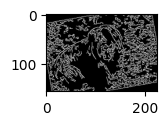

In [ ]:

#verify a gray_world implemented trianing image by showing it
plt.figure(figsize=(5, 1))
plt.imshow(cv2.cvtColor(gray_world_train_images['collie'][235], cv2.COLOR_BGR2RGB))


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np
import cv2
import os

# --- 1. Data Preparation ---
img_height, img_width = 256, 178  # Resized image dimensions #Updated line
input_shape = (img_height, img_width, 3)  #Updated line
num_classes = 10  # Number of animal classes
animals = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]

    # Create train_labels and train_images
train_labels = []
train_images = []
for animal, images in gray_world_train_images.items():
    for image in images:
        # Ensure 3 channels
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

        # Resize the image before appending
        image = cv2.resize(image, (img_width, img_height))  # Resize to target dimensions
        train_images.append(image)
        train_labels.append(animals.index(animal))

# Create test_labels and test_images
test_labels = []
test_images = []
for animal, images in test_image_paths.items():
    for image in images:
        # Ensure 3 channels
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

        # Resize the image before appending
        image = cv2.resize(image, (img_width, img_height))  # Resize to target dimensions
        test_images.append(image)
        test_labels.append(animals.index(animal))

# Convert to NumPy arrays
train_images = np.array(train_images)
test_images = np.array(test_images)


# --- 2. Data Generators ---
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    # Add other augmentations if needed (e.g., rotation, zoom, etc.)
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    train_images,
    tf.keras.utils.to_categorical(train_labels, num_classes=num_classes),
    batch_size=32,  # Adjust batch size as needed
    shuffle=True  # Shuffle training data
)

test_generator = test_datagen.flow(
    test_images,
    tf.keras.utils.to_categorical(test_labels, num_classes=num_classes),
    batch_size=32,
    shuffle=False  # Do not shuffle test data
)

# --- 3. Model Creation ---

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# --- 4. Training ---
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,  # Adjust the number of epochs
    validation_data=test_generator
)

# --- 5. Evaluation ---
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)


# --- 6. Prediction ---

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels for the test set
y_true = test_labels

# --- 7. Evaluation Metrics ---

# Print classification report and confusion matrix
print(classification_report(y_true, y_pred_classes, target_names=animals))
print(confusion_matrix(y_true, y_pred_classes))


# --- 8. Save the Model ---
model.save('animal_detection_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 496s 3s/step - accuracy: 0.1226 - loss: 2.4459 - val_accuracy: 0.2785 - val_loss: 2.0758
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 489s 3s/step - accuracy: 0.2671 - loss: 2.0304 - val_accuracy: 0.3892 - val_loss: 1.7034
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 499s 3s/step - accuracy: 0.4649 - loss: 1.5538 - val_accuracy: 0.4277 - val_loss: 1.6647
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 529s 4s/step - accuracy: 0.6398 - loss: 1.0372 - val_accuracy: 0.4482 - val_loss: 1.7533
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 497s 3s/step - accuracy: 0.7989 - loss: 0.5955 - val_accuracy: 0.4297 - val_loss: 1.9656
61/61 - 53s - 869ms/step - accuracy: 0.4297 - loss: 1.9656

Test accuracy: 0.42974358797073364
61/61 ━━━━━━━━━━━━━━━━━━━━ 54s 875ms/step


              precision    recall  f1-score   support

      collie       0.25      0.46      0.32       195
     dolphin       0.73      0.87      0.79       195
    elephant       0.43      0.43      0.43       195
         fox       0.30      0.17      0.22       195
       moose       0.39      0.29      0.33       195
      rabbit       0.45      0.32      0.38       195
       sheep       0.37      0.47      0.41       195
    squirrel       0.26      0.23      0.24       195
 giant+panda       0.71      0.59      0.65       195
  polar+bear       0.53      0.47      0.50       195

    accuracy                           0.43      1950
   macro avg       0.44      0.43      0.43      1950
weighted avg       0.44      0.43      0.43      1950

[[ 90   4  22   6  14   8  25   5  16   5]
 [ 11 169   2   2   4   0   2   3   1   1]
 [ 39   3  83  12  18   2  18  14   2   4]
 [ 29   0  20  34  13  25  21  30   4  19]
 [ 49   6  25   8  56   8  16  20   6   1]
 [ 31   1   8  14   5  63 